In [2]:
import numpy as np
from itertools import accumulate
from matplotlib import pyplot as plt

from multi_armed_bandit import MultiArmedBandit
from greedy import *

%matplotlib inline

In [6]:
random_env = MultiArmedBandit.random_gen(10, scale = 0)
random_env.means

[-0.02847630544597599,
 -0.5651890438587449,
 -1.1705459434680188,
 1.2583645104438455,
 -0.1207913903441267,
 -1.831618951442613,
 1.5212078334561294,
 0.4351326045188078,
 -0.8075520652281526,
 0.3128314705308113]

In [7]:
testbed_env = MultiArmedBandit([0.2, -0.9, 1.2, 0.4, 1.0, -1.8, -0.2, -1.2, 0.8, -0.45 ], scale = 1)

In [8]:
def single_run(g, numsteps):
    for i in range(numsteps):
        g.step()
    cumulative_mean_rewards = [ r/n for r, n in zip(list(accumulate(g.env.rewards)), range(1,numsteps+1)) ]
    cumulative_best_action_perc = [ r/n for r, n in zip(list(accumulate(g.env.best_actions)), range(1,numsteps+1)) ]
    return g.env.rewards.copy(), cumulative_mean_rewards, cumulative_best_action_perc

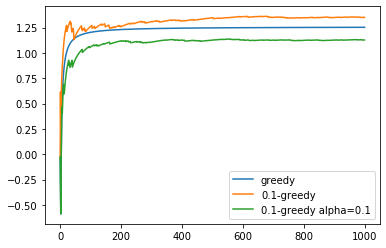

In [10]:
maxsteps = 1000
g1 = MeanValueEpsilonGreedy(random_env.copy(), epsilon = 0.0)
g2 = MeanValueEpsilonGreedy(random_env.copy(), epsilon = 0.1)
g3 = ConstantStepEpsilonGreedy(random_env.copy(), epsilon = 0.1, rate = 0.1)
rewards1, mean_rewards1, best_actions_perc1 = single_run(g1, maxsteps)
rewards2, mean_rewards2, best_actions_perc2 = single_run(g2, maxsteps)
rewards3, mean_rewards3, best_actions_perc3 = single_run(g3, maxsteps)
plt.plot(range(maxsteps), mean_rewards1, label = "greedy")
plt.plot(range(maxsteps), mean_rewards2, label = "0.1-greedy")
plt.plot(range(maxsteps), mean_rewards3, label = "0.1-greedy alpha=0.1")
plt.legend()
plt.show()

In [11]:
def multi_run(learner, numsteps, numruns):
    mean_rewards = np.zeros(numsteps)
    mean_bestactions = np.zeros(numsteps)
    for r in range(numruns):
        for i in range(numsteps):
            learner.step()
        mean_rewards += learner.env.rewards
        mean_bestactions += learner.env.best_actions
        learner.reset()
    mean_rewards /= numruns
    mean_bestactions /= numruns
    return mean_rewards, mean_bestactions

In [10]:
%prun _ = multi_run(MeanValueEpsilonGreedy(m.copy(), epsilon = 0), 1000, 2000)

CPU times: user 13.4 s, sys: 33.2 ms, total: 13.4 s
Wall time: 13.7 s


In [12]:
mean_rewards1, mean_bestactions1 = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0), 1000, 2000)
mean_rewards2, mean_bestactions2 = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0.01), 1000, 2000)
mean_rewards3, mean_bestactions3 = multi_run(MeanValueEpsilonGreedy(testbed_env.copy(), epsilon = 0.1), 1000, 2000)

In [36]:
def multi_run_graph(labels, mean_rewards, mean_bestactions):
    plots = len(labels)
    steps = len(mean_rewards[0])
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    for i in range(plots):
        plt.plot(range(steps), mean_rewards[i], label = labels[i])
    plt.xlabel("iteraton steps")
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(122)
    for i in range(plots):
        plt.plot(range(steps), mean_bestactions[i], label = labels[i])
    plt.xlabel("iteraton steps")
    plt.ylabel("% of correct actions")
    plt.legend()

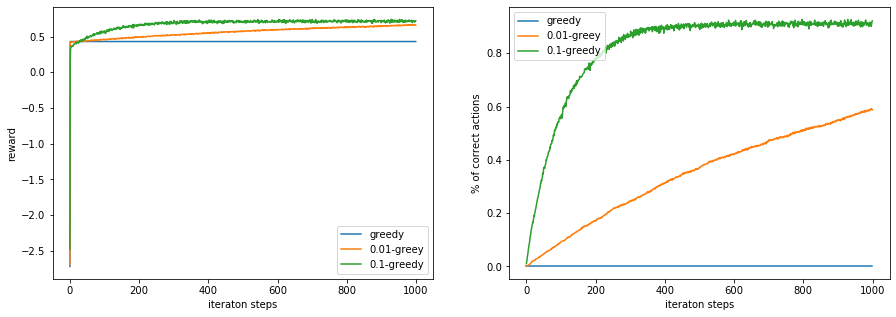

In [37]:
multi_run_graph(["greedy", "0.01-greey", "0.1-greedy"],
                [mean_rewards1, mean_rewards2, mean_rewards3],
                [mean_bestactions1, mean_bestactions2, mean_bestactions3])
plt.show()

In [38]:
mean_rewards1, mean_bestactions1 = multi_run(ConstantStepEpsilonGreedy(m.copy(), epsilon = 0.1, rate = 0.01), 1000, 2000)
mean_rewards2, mean_bestactions2 = multi_run(ConstantStepEpsilonGreedy(m.copy(), epsilon = 0.1, rate = 0.05), 1000, 2000)
mean_rewards3, mean_bestactions3 = multi_run(ConstantStepEpsilonGreedy(m.copy(), epsilon = 0.1, rate = 0.1), 1000, 2000)

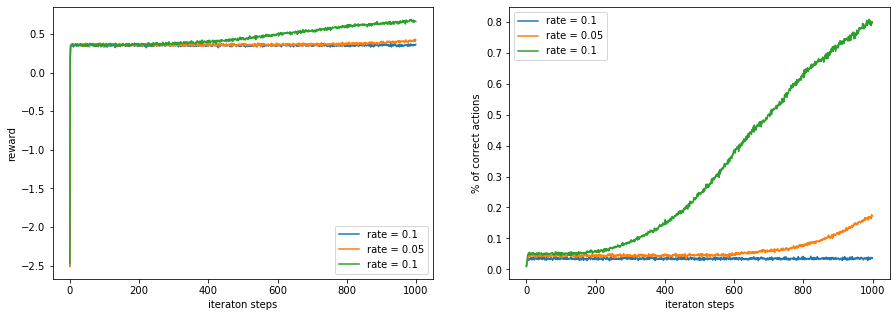

In [42]:
multi_run_graph(["rate = 0.1", "rate = 0.05", "rate = 0.1"],
                [mean_rewards1, mean_rewards2, mean_rewards3],
                [mean_bestactions1, mean_bestactions2, mean_bestactions3])
plt.show()

In [58]:
mean_rewards1, mean_bestactions1 = multi_run(ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.0, rate = 0.1, initial_estimate = 5 ), 1000, 2000)
mean_rewards2, mean_bestactions2 = multi_run(ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.0, rate = 0.1), 1000, 2000)
mean_rewards3, mean_bestactions3 = multi_run(ConstantStepEpsilonGreedy(testbed_env.copy(), epsilon = 0.1, rate = 0.1), 1000, 2000)

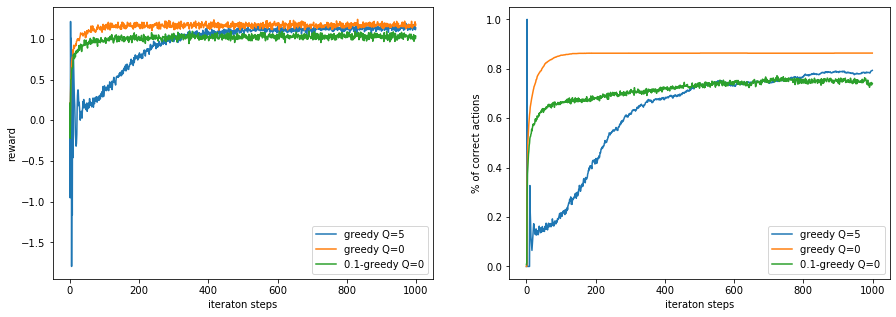

In [60]:
multi_run_graph(["greedy Q=5", "greedy Q=0","0.1-greedy Q=0"],
                [mean_rewards1, mean_rewards2, mean_rewards3],
                [mean_bestactions1, mean_bestactions2, mean_bestactions3])
